In [9]:
import tensorflow as tf
import keras


print("Tensorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Tensorflow version: 2.15.0
Keras version: 3.2.1


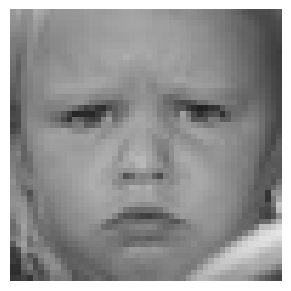

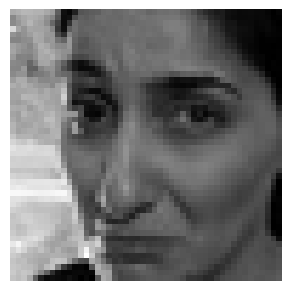

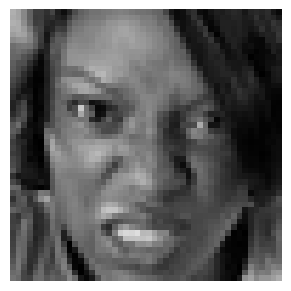

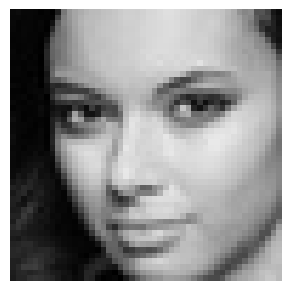

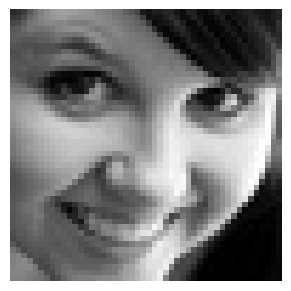

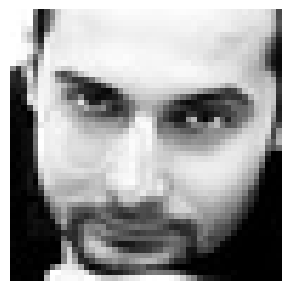

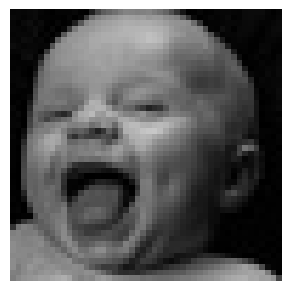

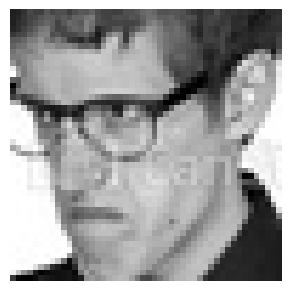

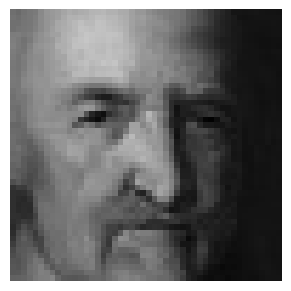

In [10]:
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2


images = glob("/kaggle/input/fer2013/train/**/**")
for i in range (9):
    Image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(Image));plt.axis('off')

Preparing Data for training

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/train/",
                                                    target_size= (img_size,img_size),
                                                    color_mode= "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/test/",
                                                    target_size= (img_size,img_size),
                                                    color_mode= "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Defining Model

In [12]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout, Conv2D
from tensorflow.keras.layers import Activation, MaxPooling2D


def Convolution(input_tensor, filter, kernel_size):
    x = Conv2D(filters=filter, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    return x



In [13]:
from tensorflow.keras.layers import Dense, Dropout


def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x



In [14]:
from tensorflow.keras.layers import Flatten, Input
from tensorflow.keras.models import Model
from keras.optimizers import Adam

def model_fer(inputs):
    conv_1 = Convolution(inputs,64,(3,3))
    conv_2 = Convolution(conv_1 ,128,(5,5))
    conv_3 = Convolution(conv_2,512,(3,3))
    conv_4 = Convolution(conv_3,512,(3,3))

    flatten = Flatten()(conv_4)

    dense_1 = Dense_f(flatten,256)
    dense_2 = Dense_f(dense_1,512)

    output = Dense(7,activation= "softmax")(dense_2)
    model = Model(inputs = [inputs], outputs = [output])  # Use 'inputs' instead of 'input'
    
    opt = Adam(learning_rate=0.0005)
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

    return model



    

In [15]:
# Define the input shape
input_shape = (48,48,1)

# Create an Input layer
input_layer = Input(shape=input_shape)

# Pass the input layer to your model function
model = model_fer(input_layer)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,90

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

Initiating the Model

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("kaggle_model.weights.h5", monitor = 'val_accuracy', save_weights_only= True, mode='auto', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 2, min_lr = 0.00001)
callbacks = [checkpoint, reduce_lr]

## Training the Model

In [17]:
history = model.fit(
    x = train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:38:00 21s/step - accuracy: 0.0781 - loss: 2.2792

I0000 00:00:1715709279.521785     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715709279.549898     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.2729 - loss: 1.8936

W0000 00:00:1715709414.737408     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: saving model to kaggle_model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 187s 370ms/step - accuracy: 0.2730 - loss: 1.8932 - val_accuracy: 0.4054 - val_loss: 1.5225 - learning_rate: 0.0010
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4531 - loss: 1.4214

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to kaggle_model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4531 - loss: 1.4214 - val_accuracy: 0.7000 - val_loss: 1.0129 - learning_rate: 0.0010
Epoch 3/15


W0000 00:00:1715709445.979483     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4458 - loss: 1.4399
Epoch 3: saving model to kaggle_model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 34s 74ms/step - accuracy: 0.4458 - loss: 1.4398 - val_accuracy: 0.4667 - val_loss: 1.4213 - learning_rate: 0.0010
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4844 - loss: 1.2893
Epoch 4: saving model to kaggle_model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.4844 - loss: 1.2893 - val_accuracy: 0.6000 - val_loss: 0.9349 - learning_rate: 0.0010
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5131 - loss: 1.2780
Epoch 5: saving model to kaggle_model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.5131 - loss: 1.2780 - val_accuracy: 0.5172 - val_loss: 1.2496 - learning_rate: 0.0010
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5000 - loss: 1.2242
Epoch 6: saving model to kaggle_model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/

Model Evaluation

In [18]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6034 - loss: 1.0608


[1.0786352157592773, 0.5952911376953125]

Plotting Loss

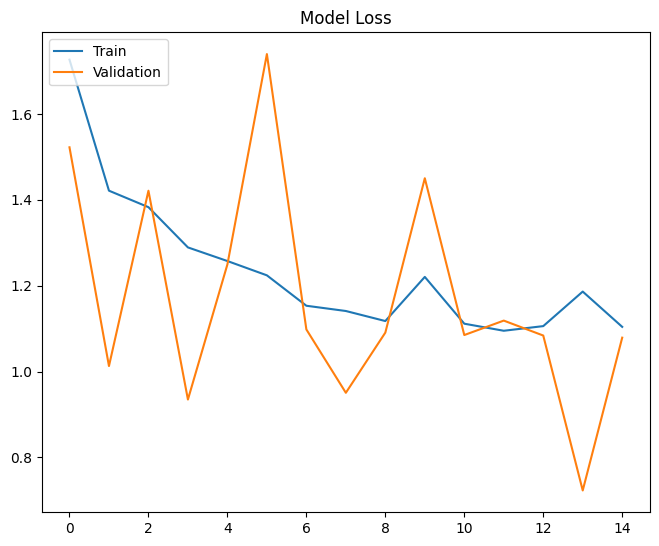

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

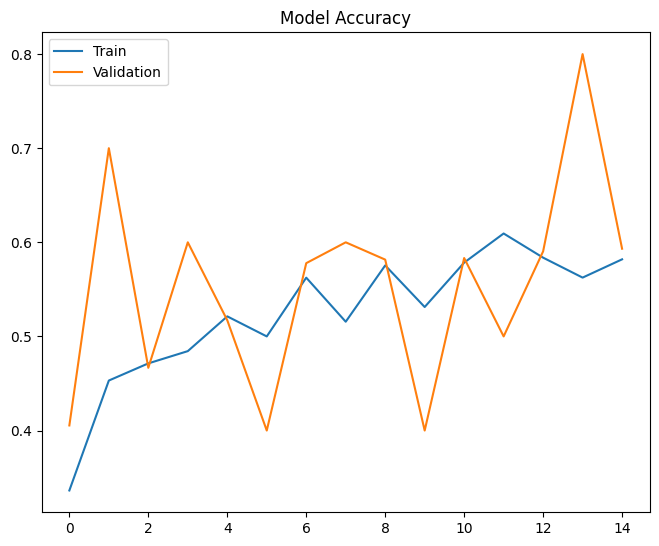

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

Saving Model

In [21]:
model_json = model.to_json()
with open("Trained_model_kaggle.json","w") as json_file:
    json_file.write(model_json)